In [1]:
print('Architecture of RNN using LSTM')

Architecture of RNN using LSTM


In [2]:
import sys 
import numpy as np # linear algebra
from scipy.stats import randint

In [3]:
import pandas as pd


In [4]:
import matplotlib.pyplot as plt # this is used for plotting the graph


In [5]:
import seaborn as sns  
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold #cross validation is not active anymore
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import SelectFromModel
from sklearn import metrics 
from sklearn.metrics import mean_squared_error,r2_score # I have mentioned everything regarding this model in my Sprint 1

In [6]:
import keras
from keras.layers import Dense
from keras.models import Sequential
from tensorflow.keras.utils import to_categorical #TensorFlow is a free and open-source software library
from tensorflow.keras.optimizers import SGD 
from keras.callbacks import EarlyStopping
from keras.utils import np_utils
import itertools
from keras.layers import LSTM # Long short term memory model
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.layers import Dropout

In [7]:
df = pd.read_csv("household_power_consumption.txt", sep=',',infer_datetime_format=True,parse_dates={'dt' : ['Date', 'Time']},  low_memory=False, na_values=['nan','?'], index_col='dt')

In [8]:
df.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
dt,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
2006-12-16 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
2006-12-16 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0


In [9]:
droping_list_all=[]
for j in range(0,7):
    if not df.iloc[:, j].notnull().all(): #.iloc Purely integer-location based indexing for selection by position and can take array as input
        droping_list_all.append(j)        
droping_list_all #checking for null values

[0, 1, 2, 3, 4, 5, 6]

In [10]:
df.isnull().sum()

Global_active_power      25979
Global_reactive_power    25979
Voltage                  25979
Global_intensity         25979
Sub_metering_1           25979
Sub_metering_2           25979
Sub_metering_3           25979
dtype: int64

In [11]:
# I am gonna fill the nan values with mean


In [12]:
for j in range(0,7):        
        df.iloc[:,j]=df.iloc[:,j].fillna(df.iloc[:,j].mean())

In [13]:
# I joined the date and time as dt for easy data visualization

In [14]:
#Below I resample over day, and show the sum and mean of Global_active_power. It is seen that mean and sum of resampled data set, have similar structure.

<AxesSubplot:title={'center':'Global_active_power resampled sum'}, xlabel='dt'>

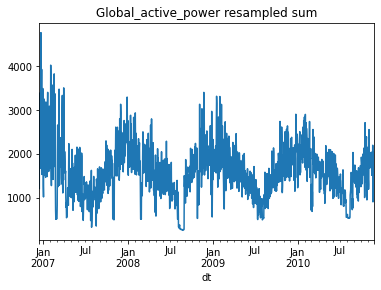

In [15]:
df.Global_active_power.resample('D').sum().plot(title='Global_active_power resampled sum') 

In [16]:
plt.tight_layout()
plt.show() 

<Figure size 432x288 with 0 Axes>

<AxesSubplot:title={'center':'Global_active_power resampled mean'}, xlabel='dt'>

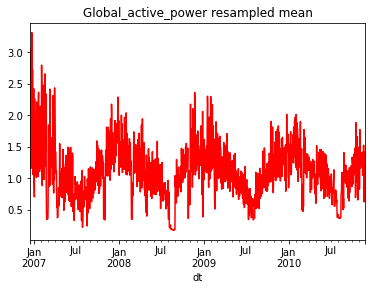

In [17]:
df.Global_active_power.resample('D').mean().plot(title='Global_active_power resampled mean', color='red') 

In [18]:
plt.tight_layout()
plt.show() 

<Figure size 432x288 with 0 Axes>

In [19]:
r = df.Global_intensity.resample('D').agg(['mean', 'std'])

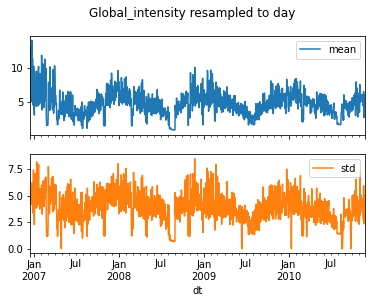

In [20]:
r.plot(subplots = True, title='Global_intensity resampled to day')
plt.show()

In [21]:
# above I show mean and std of global intensity

In [22]:
r2 = df.Global_reactive_power.resample('D').agg(['mean', 'std'])

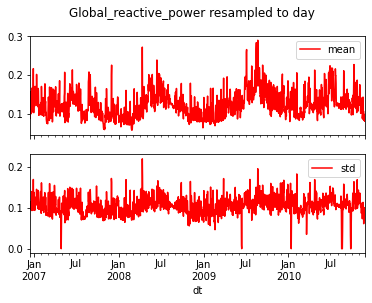

In [23]:
r2.plot(subplots = True, title='Global_reactive_power resampled to day', color='red')
plt.show()

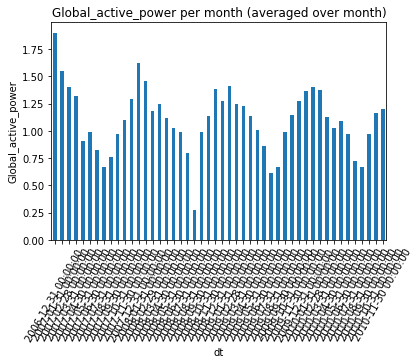

In [24]:
df['Global_active_power'].resample('M').mean().plot(kind='bar')
plt.xticks(rotation=60) # Sum of 'Global_active_power' resampled over month
plt.ylabel('Global_active_power')
plt.title('Global_active_power per month (averaged over month)')
plt.show()

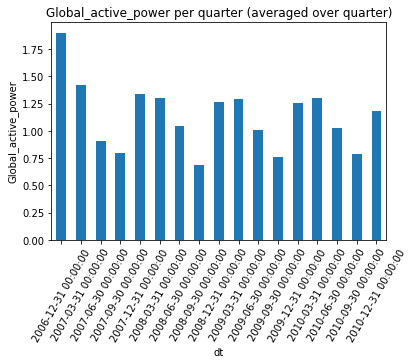

In [25]:
df['Global_active_power'].resample('Q').mean().plot(kind='bar')
plt.xticks(rotation=60)
plt.ylabel('Global_active_power')
plt.title('Global_active_power per quarter (averaged over quarter)')
plt.show()

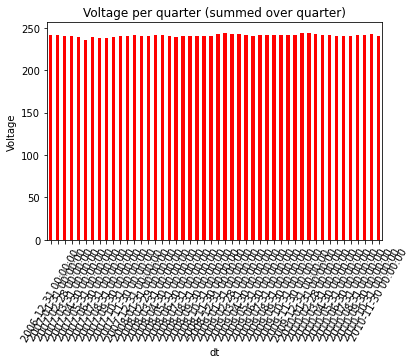

In [26]:
df['Voltage'].resample('M').mean().plot(kind='bar', color='red')
plt.xticks(rotation=60)
plt.ylabel('Voltage')
plt.title('Voltage per quarter (summed over quarter)')
plt.show()

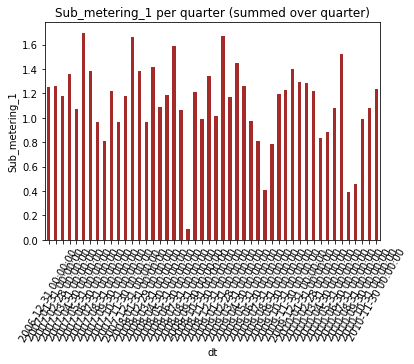

In [27]:
df['Sub_metering_1'].resample('M').mean().plot(kind='bar', color='brown')
plt.xticks(rotation=60)
plt.ylabel('Sub_metering_1')
plt.title('Sub_metering_1 per quarter (summed over quarter)')
plt.show()

In [28]:
#It is seen from the above plots that the mean of 'Volage' over month is pretty much constant compared to other features. This is important again in feature selection.

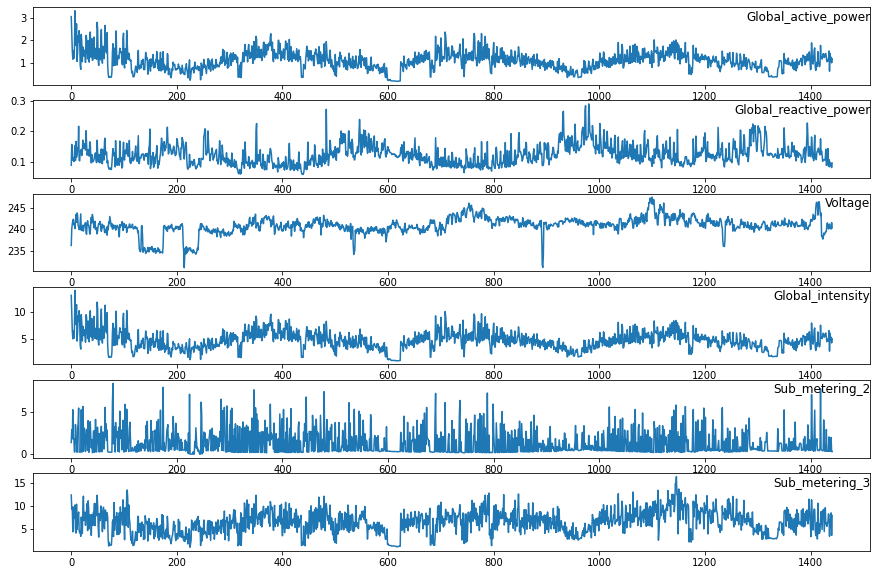

In [29]:
cols = [0, 1, 2, 3, 5, 6]
i = 1
groups=cols
values = df.resample('D').mean().values
# plot each column
plt.figure(figsize=(15, 10))
for group in groups:
	plt.subplot(len(cols), 1, i)
	plt.plot(values[:, group])
	plt.title(df.columns[group], y=0.75, loc='right')
	i += 1
plt.show()

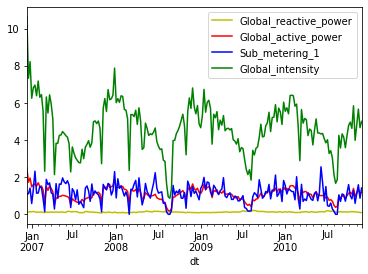

In [30]:
df.Global_reactive_power.resample('W').mean().plot(color='y', legend=True)
df.Global_active_power.resample('W').mean().plot(color='r', legend=True)
df.Sub_metering_1.resample('W').mean().plot(color='b', legend=True)
df.Global_intensity.resample('W').mean().plot(color='g', legend=True)
plt.show()

In [49]:
#I will apply recurrent nueral network (LSTM) which is best suited for time-seriers and sequential problem. This approach is the best if we have large data.
#I will frame the supervised learning problem as predicting the Global_active_power at the current time (t) given the Global_active_power measurement and other features at the prior time step.

In [32]:
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):#time series forecasting problems must be re-framed as supervised learning problems. From a sequence to pairs of input and output sequences.
	n_vars = 1 if type(data) is list else data.shape[1]
	dff = pd.DataFrame(data)
	cols, names = list(), list()
	#  sequence (a-n, ... a-1)
	for i in range(n_in, 0, -1):
		cols.append(dff.shift(i))
		names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(dff.shift(-i))
		if i == 0:
			names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
		else:
			names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
	
	agg = pd.concat(cols, axis=1)
	agg.columns = names
	# drop  NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg

In [33]:
## resampling of data over hour
df_resample = df.resample('h').mean() 
df_resample.shape

(34589, 7)

In [34]:
# I did this to reduce the computing time

In [35]:
# I scale all features in range of [0,1]. I explained this in my sprint 1 regarding why I do that and how it becomes easy for the model to make predictions.

In [36]:
values = df_resample.values 

In [1]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values) # explained sprint 1

NameError: name 'MinMaxScaler' is not defined

In [38]:
# frame as supervised learning
reframed = series_to_supervised(scaled, 1, 1)

# drop columns we don't want to predict
reframed.drop(reframed.columns[[8,9,10,11,12,13]], axis=1, inplace=True)
print(reframed.head())

   var1(t-1)  var2(t-1)  var3(t-1)  var4(t-1)  var5(t-1)  var6(t-1)  \
1   0.636816   0.295738   0.337945   0.631157        0.0   0.011366   
2   0.545045   0.103358   0.335501   0.541487        0.0   0.144652   
3   0.509006   0.110073   0.283802   0.502152        0.0   0.030869   
4   0.488550   0.096987   0.315987   0.481110        0.0   0.000000   
5   0.455597   0.099010   0.434417   0.449904        0.0   0.008973   

   var7(t-1)   var1(t)  
1   0.782418  0.545045  
2   0.782676  0.509006  
3   0.774169  0.488550  
4   0.778809  0.455597  
5   0.798917  0.322555  


In [39]:
#First, I split the prepared dataset into train and test sets. To speed up the training of the model (for the sake of the demonstration), we will only train the model on the first year of data, then evaluate it on the next 3 years of data.

In [40]:
# split  train and test sets
values = reframed.values

n_train_time = 365*24
train = values[:n_train_time, :]
test = values[n_train_time:, :]
# split into input and outputs
train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]
# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape) 

(8760, 1, 7) (8760,) (25828, 1, 7) (25828,)


In [41]:
# Now the model architecture starts which is my main task for sprint 3

In [42]:
# I am gonna put LSTM with 100 nuerons in the first visible layer iwth a droput rate of 20 percent. 1 nueron will be placed in the output layer for predicting global active power.

In [43]:
# 1 output layer and leaves us with 7 features.

In [44]:
# I use mean absolut error loss function as explained in sprint 1.

In [45]:
model = Sequential()
model.add(LSTM(100, input_shape=(train_X.shape[1], train_X.shape[2])))  # Here we used LSTM with input described above.
model.add(Dropout(0.2))

In [46]:
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam') # efficient Adam version of stochastic gradient descent (found it through one of the articles)

In [47]:
# Now is the time to fit it into the network.

In [48]:
history = model.fit(train_X, train_y, epochs=20, batch_size=70, validation_data=(test_X, test_y), verbose=2, shuffle=False)

Epoch 1/20
126/126 - 2s - loss: 0.0188 - val_loss: 0.0118 - 2s/epoch - 16ms/step
Epoch 2/20
126/126 - 0s - loss: 0.0123 - val_loss: 0.0104 - 431ms/epoch - 3ms/step
Epoch 3/20
126/126 - 0s - loss: 0.0113 - val_loss: 0.0095 - 417ms/epoch - 3ms/step
Epoch 4/20
126/126 - 0s - loss: 0.0107 - val_loss: 0.0093 - 451ms/epoch - 4ms/step
Epoch 5/20
126/126 - 0s - loss: 0.0106 - val_loss: 0.0095 - 464ms/epoch - 4ms/step
Epoch 6/20
126/126 - 0s - loss: 0.0106 - val_loss: 0.0092 - 423ms/epoch - 3ms/step
Epoch 7/20
126/126 - 0s - loss: 0.0105 - val_loss: 0.0092 - 428ms/epoch - 3ms/step
Epoch 8/20
126/126 - 0s - loss: 0.0105 - val_loss: 0.0093 - 451ms/epoch - 4ms/step
Epoch 9/20
126/126 - 0s - loss: 0.0105 - val_loss: 0.0092 - 425ms/epoch - 3ms/step
Epoch 10/20
126/126 - 0s - loss: 0.0105 - val_loss: 0.0092 - 455ms/epoch - 4ms/step
Epoch 11/20
126/126 - 0s - loss: 0.0105 - val_loss: 0.0092 - 439ms/epoch - 3ms/step
Epoch 12/20
126/126 - 0s - loss: 0.0104 - val_loss: 0.0092 - 427ms/epoch - 3ms/step
Epo

In [50]:
# we are now gonna summarize the history through loss by plotting

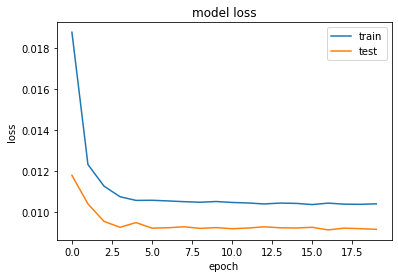

In [51]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [52]:
# make a prediction
yhat = model.predict(test_X)
test_X = test_X.reshape((test_X.shape[0], 7))
# invert scaling for forecast
inv_yhat = np.concatenate((yhat, test_X[:, -6:]), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]
# invert scaling for actual
test_y = test_y.reshape((len(test_y), 1))
inv_y = np.concatenate((test_y, test_X[:, -6:]), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]
# calculate RMSE
rmse = np.sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 0.616


In [53]:
# Since every step is one hour

In [54]:
# I am gonna compare the predictions for only the first 200 hours.

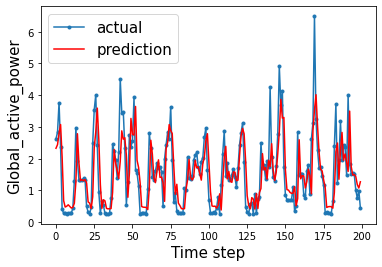

In [55]:
aa=[x for x in range(200)]
plt.plot(aa, inv_y[:200], marker='.', label="actual")
plt.plot(aa, inv_yhat[:200], 'r', label="prediction")
plt.ylabel('Global_active_power', size=15)
plt.xlabel('Time step', size=15)
plt.legend(fontsize=15)
plt.show()